### 20/11

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib widget

In [2]:
science_list = np.genfromtxt('../group08_HAT-P-12_20230214/science/science_list', dtype=str)
science_test_list=science_list[:10]
science_frame_name='../group08_HAT-P-12_20230214/correct/'+science_test_list[-1][:-5]+'.p'
science_corrected=pickle.load(open(science_frame_name,'rb'))

In [3]:
x_target_refined = 68.72
y_target_refined = 74.42

In [4]:
ylen,xlen=np.shape(science_corrected)
X_axis=np.arange(0,xlen)
Y_axis=np.arange(0,ylen)
X,Y=np.meshgrid(X_axis,Y_axis)

target_distance = np.sqrt((X - x_target_refined)**2 + (Y-y_target_refined)**2)

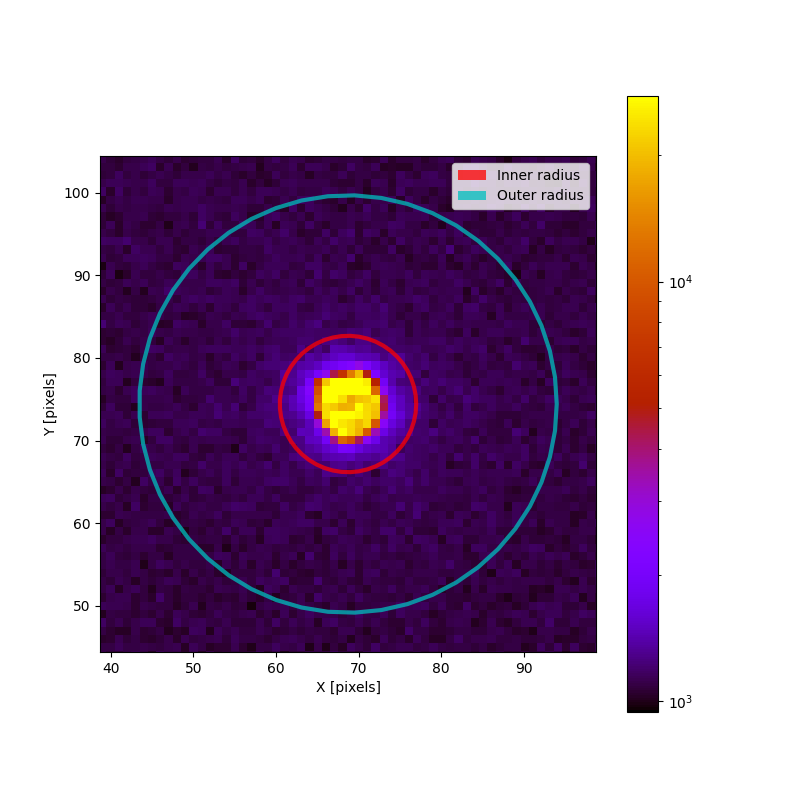

In [5]:
from matplotlib import colors
vmin = np.amin(science_corrected[:, 100:400])
vmax = np.amax(science_corrected[:, 100:400])

def make_circle_around_star(x_pos,y_pos,radius, color='w',label='',thickness=0.5, alpha=1.): #we add radius, thickness and alpha term to our old function
    #from matplotlib.patches import Circle
    radii=[radius,radius+thickness]
    n=50 #our linspace length
    theta=np.linspace(0,2*np.pi,n)
    xs=np.outer(radii,np.cos(theta))#makes x coord of inner circle, then outer circle 
    ys=np.outer(radii,np.sin(theta))#makes y coord of inner circle, then outer circle
    xs[1,:]=xs[1,::-1]
    ys[1,:]=ys[1,::-1]
    
    ax.fill(np.ravel(xs)+x_pos,np.ravel(ys)+y_pos,
            edgecolor=None,facecolor=color,
           alpha=0.75,
           label=label) #filling up the circle, alpha is transparency

inner_radius= 8    #write them the in the report
outer_radius = 25

fig, ax = plt.subplots(1, figsize = (8, 8))
im1 = plt.imshow(science_corrected, cmap=plt.colormaps['gnuplot'],
                 norm=colors.LogNorm(vmin=vmin, vmax=vmax),
                 origin='lower')

make_circle_around_star(x_target_refined,y_target_refined,radius=inner_radius,color='r',label='Inner radius')
make_circle_around_star(x_target_refined,y_target_refined,outer_radius,color='c',label='Outer radius')

plt.colorbar(im1, ax=ax)
plt.xlabel('X [pixels]')
plt.ylabel('Y [pixels]')
plt.legend(loc='upper right')
plt.xlim(x_target_refined-outer_radius*1.2,x_target_refined+outer_radius*1.2)
plt.ylim(y_target_refined-outer_radius*1.2,y_target_refined+outer_radius*1.2)
plt.show()

#This must be done also for reference stars

In [6]:
annulus_selection = (target_distance > inner_radius) & (target_distance < outer_radius)
#print(np.sum(annulus_selection))    #number of pixels for which this condition is true
#print(np.sqrt(np.sum(annulus_selection)))   #photon noise

sky_flux_average = np.sum(science_corrected[annulus_selection]) / np.sum(annulus_selection)
sky_flux_median = np.median(science_corrected[annulus_selection])
print('Number of pixels in the annulus: {0:5.0f}'.format(np.sum(annulus_selection)))
print('Average sky flux per pixel: {0:7.1f}'.format(sky_flux_average))
print('Median sky flux per pixel: {0:7.1f}'.format(sky_flux_median))        #compute the associated errors to verify that they are consistent

Number of pixels in the annulus:  1766
Average sky flux per pixel:  1121.6
Median sky flux per pixel:  1118.9


In [7]:
#subtract sky from the image

science_sky_corrected = science_corrected - sky_flux_median
#science_sky_corrected_err = ??? -> CALCULATE IT

#this procedure must be done again for the reference stars since we are considering a region around the target star. Therefore, this frame can be used to perform
#aperture photometry only for the target star

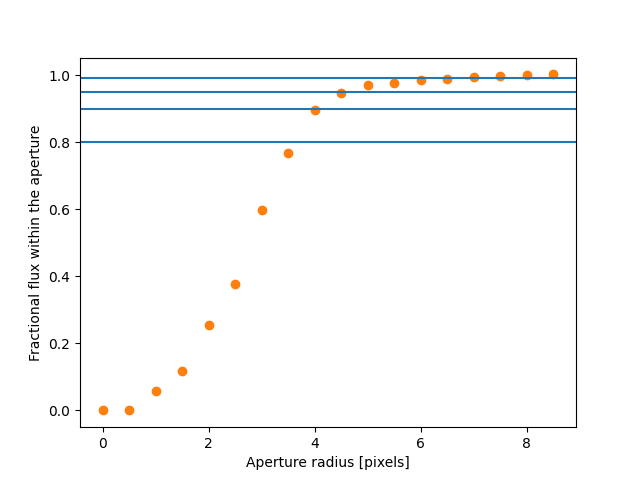

In [8]:
plt.figure()

inner_selection = (target_distance < inner_radius)
total_flux = np.sum(science_sky_corrected[inner_selection])

radius_array = np.arange(0, inner_radius+1., 0.5)
flux_vs_radius = np.zeros_like(radius_array)

for ii, aperture_radius in enumerate(radius_array):
    aperture_selection = (target_distance < aperture_radius)
    flux_vs_radius[ii] = np.sum(science_sky_corrected[aperture_selection]) / total_flux

plt.scatter(radius_array, flux_vs_radius, c='C1')
plt.axhline(0.8)
plt.axhline(0.9)
plt.axhline(0.95)
plt.axhline(0.99)
plt.xlabel('Aperture radius [pixels]')
plt.ylabel('Fractional flux within the aperture')
plt.show()

In [9]:
aperture_01 = 3.6   #0.8
aperture_02 = 4     #0.9
aperture_03 = 4.7     #0.95

aperture_selection01 = (target_distance < aperture_01)
flux_vs_radius01 = np.sum(science_sky_corrected[aperture_selection01]) / total_flux

aperture_selection02 = (target_distance < aperture_02)
flux_vs_radius02 = np.sum(science_sky_corrected[aperture_selection02]) / total_flux

aperture_selection03 = (target_distance < aperture_03)
flux_vs_radius03 = np.sum(science_sky_corrected[aperture_selection03]) / total_flux

print('Fractional flux at aperture {0:2.1f} pixels: {1:3.3f}'.format(aperture_01, flux_vs_radius01))
print('Fractional flux at aperture {0:2.1f} pixels: {1:3.3f}'.format(aperture_02, flux_vs_radius02))
print('Fractional flux at aperture {0:2.1f} pixels: {1:3.3f}'.format(aperture_03, flux_vs_radius03))

Fractional flux at aperture 3.6 pixels: 0.793
Fractional flux at aperture 4.0 pixels: 0.897
Fractional flux at aperture 4.7 pixels: 0.958


In [10]:
#Aperture photometry

aperture_phot_selection = (target_distance < aperture_01)
aperture_photometry_01 = np.sum(science_sky_corrected[aperture_phot_selection])

In [11]:
#error associated to sky background estimete (median -> average)
#error associated to the sky corrected pixel (difference...)
#error associated to the aperture photometry (sum in quadrature of error of sky corrected)